In [295]:
import numpy as np
import matplotlib.pyplot as plt

In [296]:
# Problem 1
@np.vectorize
def square(t):
    return float(t%1 < 0.5) - float(t%1 >= 0.5)

@np.vectorize
def sawtooth(t):
    return t%1

@np.vectorize
def triangle(t):
    if t % 1 < 0.25:
        return 4 * (t % 1)
    elif t % 1 >= 0.25 and t % 1 < 0.75:
        return 2 - 4 * (t % 1)
    else:
        return 4 * (t % 1 - 1)

def integrate(x, a, b, res):
    N = int(max(1, (b - a) / res))
    interval = np.linspace(a, b, N + 1)
    step_size = (b - a) / N
    return step_size * np.sum(x(interval)) - 0.5 * (x(a) + x(b))




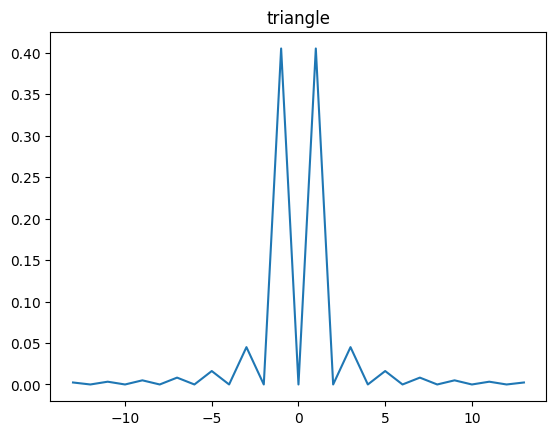

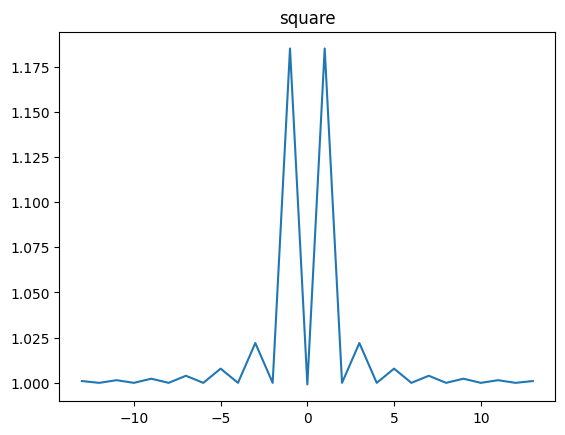

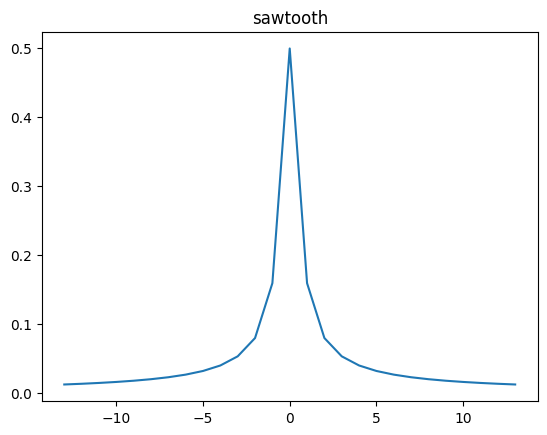

In [297]:

def gen_coefficients(K):

    def coefficients(sig):
        output = []
        for k in range(-K, K + 1):
            if k == 0:
                output.append(integrate(sig, 0., 1., 0.001))
            else:
                output.append(integrate(lambda t: sig(t) * np.e**(-1j * k * 2 * np.pi * t), 0., 1., 0.0001))
        return output

    return coefficients

def coefficients(x):
    @np.vectorize
    def f(k):
        if k == 0:
            return integrate(x, 0., 1., 0.0001)
        else:
            return integrate(lambda t: x(t) * np.e**(-1j * k * 2 * np.pi * t), 0., 1., 0.0001)
    return f

waves = [(triangle, "triangle"), (square, "square"), (sawtooth, "sawtooth")]
k_range = np.array(range(-13, 13 + 1))

for x, name in waves:
    plt.plot(k_range, np.abs(gen_coefficients(13)(x)))
    plt.title(name)
    plt.show()

    



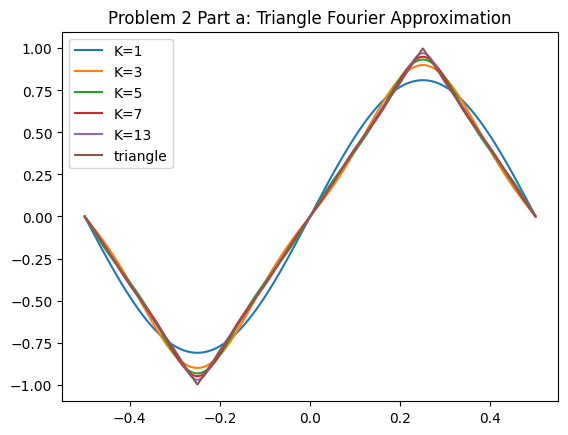

In [298]:
# Problem 2 Part a
def fourier_partial(K):
    def f(x):
        c_cache = gen_coefficients(K)(x)

        @np.vectorize
        def y(t):
            output = 0.
            for k in range(-K, K + 1):
                ci = c_cache[k + K]
                output += ci * np.e**(1j * k * 2 * np.pi * t)
            return output
        return y
    return f


time_range = np.linspace(-0.5, 0.5, 1000)
for k in [1, 3, 5, 7, 13]:
    plt.plot(time_range, fourier_partial(k)(triangle)(time_range), label=f'K={k}')
plt.plot(time_range, triangle(time_range), label="triangle")
plt.legend()
plt.title("Problem 2 Part a: Triangle Fourier Approximation")
plt.show()

    


Blip height for K=5: 3.4527254308715176
Blip height for K=13: 6.920954354467762
Blip height for K=37: 17.34612243991604
Blip height for K=79: 35.58506842596195


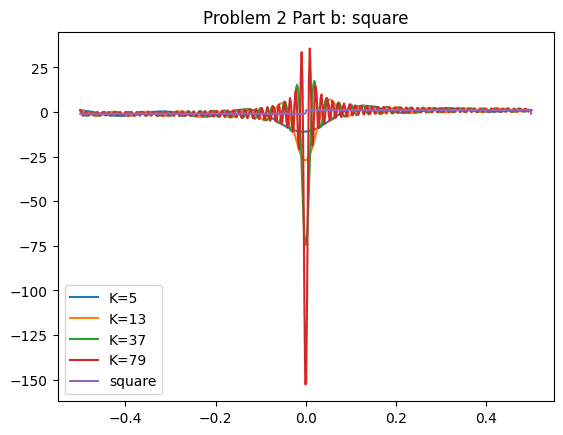

In [299]:
# Problem 2 Part b
time_range = np.linspace(-0.5, 0.5, 500)
for k in [5, 13, 37, 79]:
    y = np.real_if_close(fourier_partial(k)(square)(time_range))
    plt.plot(time_range, y, label=f'K={k}')
    print(f'Blip height for K={k}:', np.max(y))

plt.plot(time_range, square(time_range), label="square")
plt.title("Problem 2 Part b: square")
plt.legend()
plt.show()





Blip height for K=5: 1.0033343054928976
Blip height for K=13: 1.0526605215260298
Blip height for K=37: 1.075680471865097
Blip height for K=79: 1.076716617987078


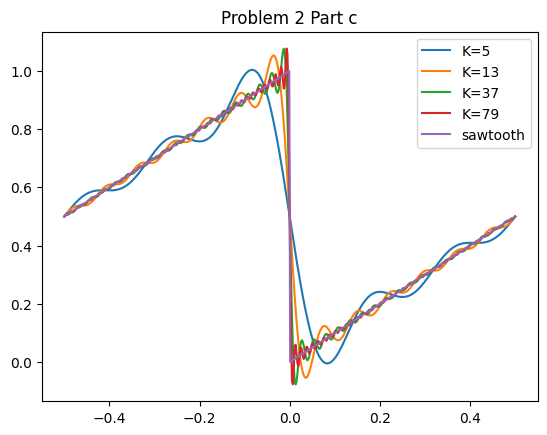

In [300]:
# Problem 2 Part c
time_range = np.linspace(-0.5, 0.5, 500)
for k in [5, 13, 37, 79]:
    y = np.real_if_close(fourier_partial(k)(sawtooth)(time_range))
    plt.plot(time_range, y, label=f'K={k}')
    print(f"Blip height for K={k}:", np.max(y))

plt.plot(time_range, sawtooth(time_range), label="sawtooth")
plt.legend()
plt.title("Problem 2 Part c")
plt.show()

[]

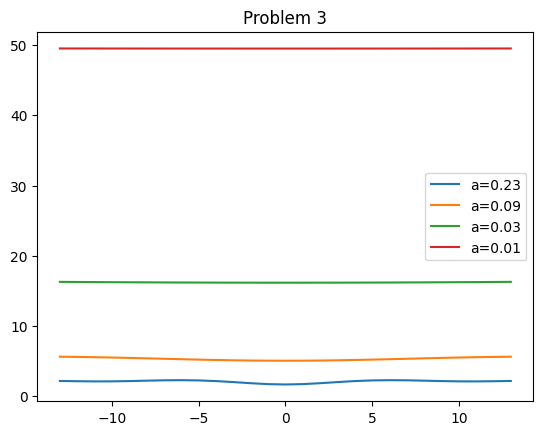

In [303]:
# Problem 3
def p(a):
    @np.vectorize
    def pa(t):
        if -a/2 <= t < a/2:
            return 1.
        return 0.
    return pa

k_range = np.array(range(-13, 14))
coefficients = gen_coefficients(13)
for a in [0.23, 0.09, 0.03, 0.01]:
    x = np.vectorize(lambda t: 1/a * p(a)(t))
    plt.plot(k_range, np.abs(coefficients(x)), label=f"a={a}")
plt.legend()
plt.title("Problem 3")
plt.plot()


